# Patterns in French YouTube Trending page


I decided to put my newly acquired data analytics skills to the test by analyzing a problem that I encounter as a content creator on YouTube. Specifically, I wanted to identify patterns among the videos that successfully appear on the YouTube trending page.

Some of the key questions I aimed to answer included:

- Does writing titles in all caps increase the chances of a video appearing on the trending page?
- Is there a correlation between the number of views and the probability of appearing on the trending page?
- Is there a correlation between the number of comments and the probability of appearing on the trending page?
- Does having a high percentage of likes to views ratio increase the chances of appearing on the trending page?
- What is the best day and time frame for posting a video to increase the chances of appearing on the trending page?


I will try through the data available in [Rishav Sharma Dataset](https://www.kaggle.com/rsrishav/youtube-trending-video-dataset?select=FR_youtube_trending_data.csv) to find any correlation or patterns

In [67]:
# Import section
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

#Import Dataset 
df = pd.read_csv('data/FR_youtube_trending_data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174590 entries, 0 to 174589
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           174590 non-null  object
 1   title              174590 non-null  object
 2   publishedAt        174590 non-null  object
 3   channelId          174590 non-null  object
 4   channelTitle       174590 non-null  object
 5   categoryId         174590 non-null  int64 
 6   trending_date      174590 non-null  object
 7   tags               174590 non-null  object
 8   view_count         174590 non-null  int64 
 9   likes              174590 non-null  int64 
 10  dislikes           174590 non-null  int64 
 11  comment_count      174590 non-null  int64 
 12  thumbnail_link     174590 non-null  object
 13  comments_disabled  174590 non-null  bool  
 14  ratings_disabled   174590 non-null  bool  
 15  description        171051 non-null  object
dtypes: bool(2), int64(5)

In [46]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,7rlwxSPUcQk,ON EST POSITIF AU COVID-19 (coronavirus),2020-08-11T16:00:31Z,UCpWaR3gNAQGsX48cIlQC0qw,Tibo InShape,17,2020-08-12T00:00:00Z,tibo inshape|teamshape|POSITIF AU COVID-19|pos...,1943013,165557,4198,15777,https://i.ytimg.com/vi/7rlwxSPUcQk/default.jpg,False,False,On a fait le test du coronavirus avec @Juju Fi...
1,AcBd_RH9JSw,PASSER UNE NUIT DANS LA PISCINE DE LA VILLA AV...,2020-08-11T10:55:22Z,UCUl7mwOyySfZzUkq4H29nug,LeBouseuh,24,2020-08-12T00:00:00Z,[None],1823553,346839,2767,8030,https://i.ytimg.com/vi/AcBd_RH9JSw/default.jpg,False,False,Abonne toi à ma chaîne ► http://urlz.fr/4jF2N...
2,JVm8P6kKgD0,FRANGLISH - My Salsa feat. Tory Lanez (clip of...,2020-08-12T10:00:11Z,UCnwfc0O-LGEg8y9bEQTaSgQ,Franglish,10,2020-08-12T00:00:00Z,franglish|tory lanez|my salsa|c'est plus l'heu...,196340,22362,187,1148,https://i.ytimg.com/vi/JVm8P6kKgD0/default.jpg,False,False,"My Salsa featuring Tory Lanez, extrait du nouv..."
3,JfgeD7xWy-w,L’ÉTÉ LE PLUS ECLATÉ DE MA LIFE,2020-08-11T16:00:08Z,UCMj2VQ3-8zpyeAI7dU0T-Bg,Fahd El,23,2020-08-12T00:00:00Z,[None],311609,29561,418,3213,https://i.ytimg.com/vi/JfgeD7xWy-w/default.jpg,False,False,"La famille, n'hésitez pas à vous abonner et à ..."
4,P3IkBxra3a8,JE L’ESSAYE ENFIN ! DUCATI HYPERMOTARD,2020-08-12T08:00:05Z,UC-uy7_1hColMpQ_2rs-kY6w,KIKANINAC,24,2020-08-12T00:00:00Z,ducati|hypermotard|950|rve|essai|test|supermot...,100691,10471,90,384,https://i.ytimg.com/vi/P3IkBxra3a8/default.jpg,False,False,Essai de la Ducati Hypermotard 950 RVE !👕 BOU...


In [47]:
#Cleaning the unnecessary columns
df.drop(['channelId', 'tags','thumbnail_link','comments_disabled','ratings_disabled','description'], axis=1, inplace=True)
df['publishedAt'] = pd.to_datetime(df['publishedAt'], format='%Y-%m-%d %H:%M:%S')
df['published_year'] = df['publishedAt'].dt.year
df['published_hour'] = df['publishedAt'].dt.hour
df['published_day'] = df['publishedAt'].apply(lambda x: dt.datetime.strftime(x, '%A'))
df['ratio'] = df['likes'] / ( df['likes'] + df['dislikes'])

## General inspections

In [48]:
df[['view_count','likes','dislikes','ratio','comment_count']].describe()

,view_count,likes,dislikes,ratio,comment_count
count,1.745900e+05,1.745900e+05,174590.000000,173115.000000,1.745900e+05
mean,1.014552e+06,6.805177e+04,732.630265,0.988262,5.588808e+03
std,4.218234e+06,3.111802e+05,7485.678513,0.034180,7.129519e+04
min,0.000000e+00,0.000000e+00,0.000000,0.106514,0.000000e+00
25%,1.008642e+05,5.824000e+03,0.000000,0.986481,2.690000e+02
50%,2.308105e+05,1.364650e+04,41.000000,0.994564,6.090000e+02
75%,6.140645e+05,3.956450e+04,242.000000,1.000000,1.625000e+03
max,2.326492e+08,1.573559e+07,848977.000000,1.000000,6.065284e+06


#### Analysis

The table above provides an overview of the average number of views, likes, dislikes, comments, and the ratio of likes to dislikes among videos that appear on the trending page. It can be observed that on average, trending videos have:

- 1,099,571 views
- 78,819.7 likes
- 1,310.24 dislikes
- A ratio of likes to dislikes of 97%
- 7,305 comments
  
However, it's worth noting that these are just averages and should not be taken as conclusive evidence since it might not represent the whole data set and can be misleading if not cross-referenced with other variables.

## The 20 Top performing channels ordered by their appearance 

In [49]:
grouped = pd.pivot_table(df,index='channelTitle',columns=['published_year'],values='video_id',aggfunc='count',margins='sum')
grouped = grouped.sort_values(by='All', ascending=False).head(21)
grouped = grouped.sort_values(by='All', ascending=True)
grouped = grouped.drop(['All'])
grouped.drop(['All'], axis=1, inplace=True)

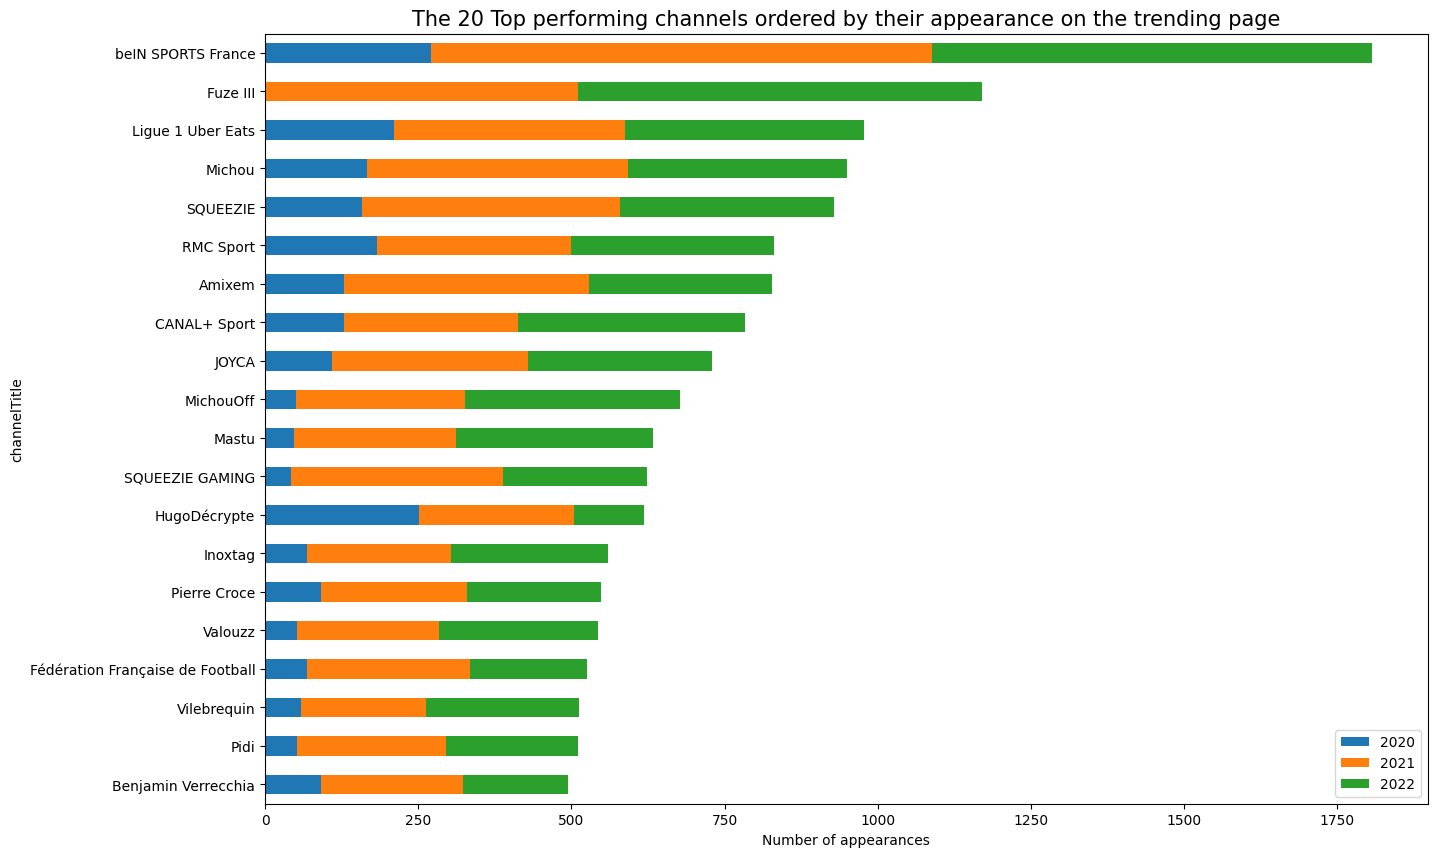

In [50]:
grouped.plot.barh(stacked=True,figsize=(15,10))

plt.legend()
plt.title('The 20 Top performing channels ordered by their appearance on the trending page',fontsize=15)
plt.xlabel('Number of appearances')

plt.show()

#### Analysis 
Upon analyzing the data, it is apparent that there is a strong presence of football-related YouTube channels, particularly those associated with local television stations.

In terms of full-time dedicated YouTubers, the top five channels are:

1. Michou
2. SQUEEZIE
3. HugoDécrypte
4. Amixem
5. Fuze III
   
It should be noted that this ranking is based on the data that was available and analyzed, and may not be a complete representation of all full-time YouTubers in the region.

## Does the title written in CAPSLOCK affect your visibility?

In [51]:
def caps_percent(title):
    title = title.replace(" ","")
    if len(title) <= 0: return 0
    s = sum(1 for cr in title if cr.isupper())
    return ((round((s/len(title))*100,0)) // 5)*5
    #To make categories based on 5

df['percent_caps'] = df.title.apply(caps_percent)
df['len_title'] = df.title.apply(len)

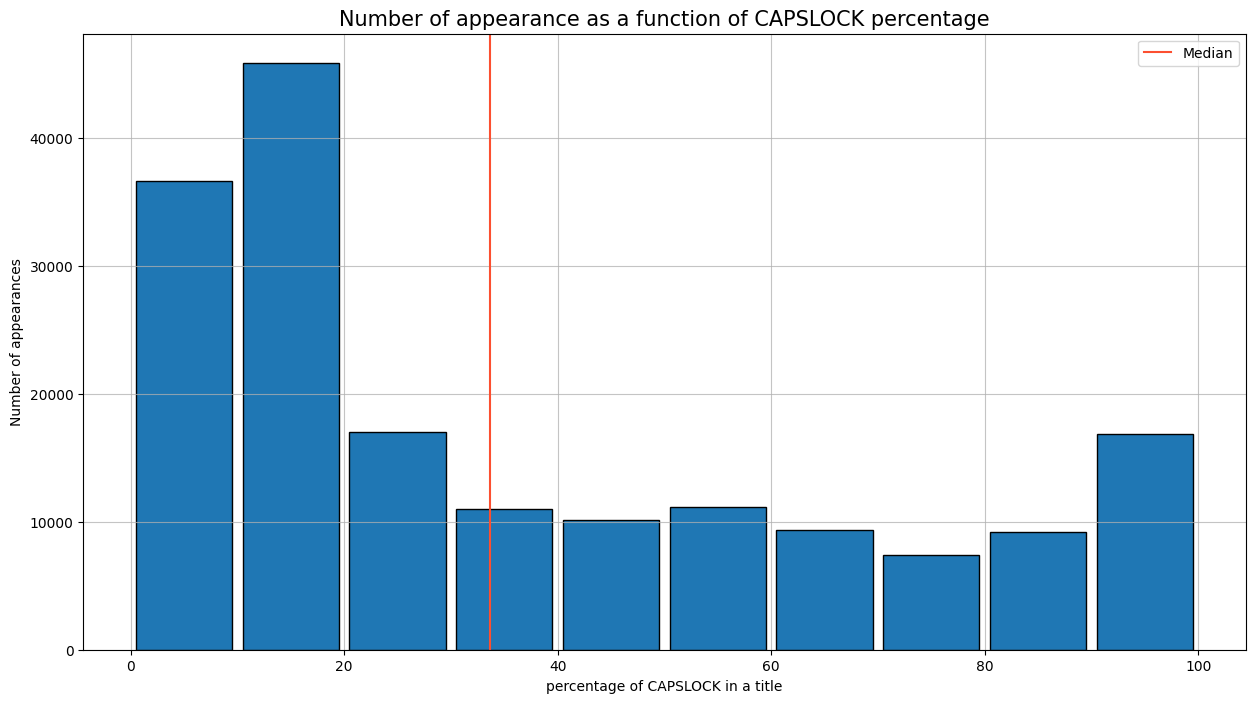

In [52]:
plt.figure(figsize=[15,8])
plt.hist(df['percent_caps'],edgecolor='black', rwidth=0.9)

median_caps = df['percent_caps'].mean()
plt.axvline(median_caps,color='#fc4f30',label='Median')

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('Number of appearance as a function of CAPSLOCK percentage',fontsize=15)
plt.xlabel('percentage of CAPSLOCK in a title')
plt.ylabel('Number of appearances')

plt.show()

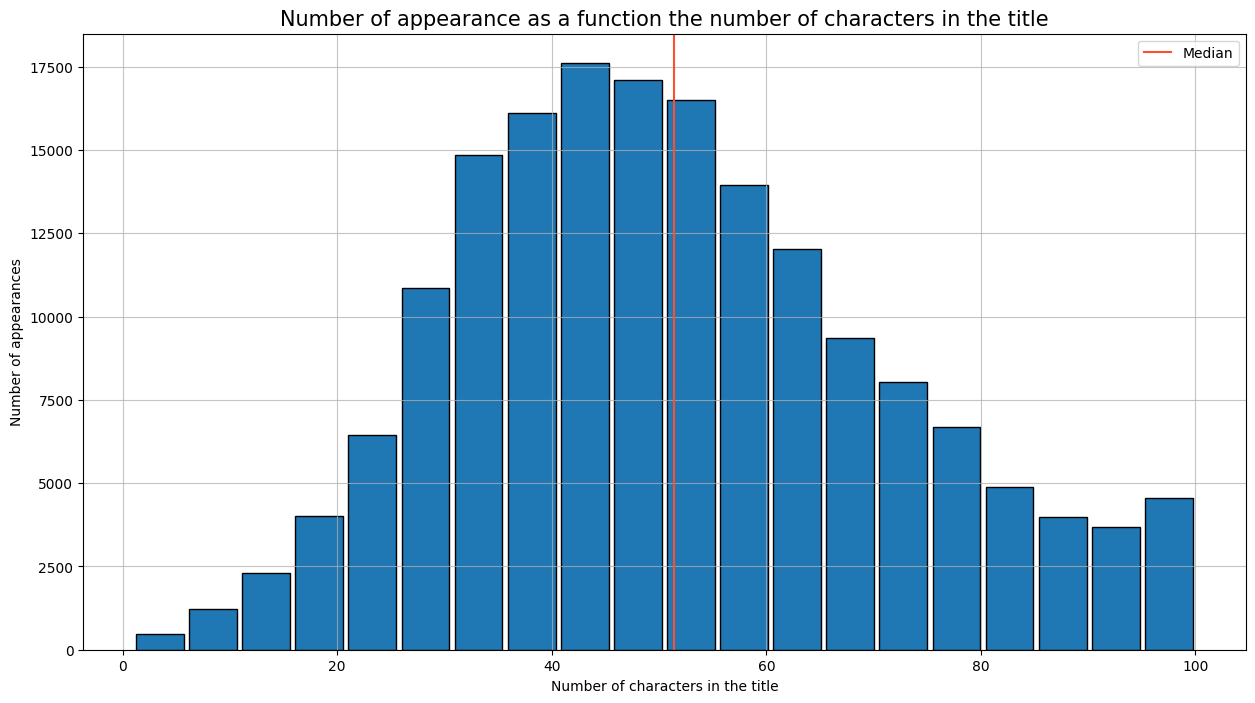

In [53]:
plt.figure(figsize=[15,8])
plt.hist(df['len_title'],bins=20, edgecolor='black', rwidth=0.9)

median_caps = df['len_title'].mean()
plt.axvline(median_caps,color='#fc4f30',label='Median')

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('Number of appearance as a function the number of characters in the title',fontsize=15)
plt.xlabel('Number of characters in the title')
plt.ylabel('Number of appearances')

plt.show()

#### Analysis & Conclusion:

The graph above illustrates that there is no correlation between the use of all caps in video titles and the likelihood of appearing on the trending page. It seems that using all caps in titles may be used as a tactic for clickbait, however, the YouTube algorithm does not seem to favor this trend.

Additionally, it appears that having an average title length of 40 characters may increase the chances of a video appearing on the trending page.

It's worth noting that in the data set used for this analysis, all titles above 100 characters were truncated and may not be fully representative of the actual title length. So, this information should be taken with caution.

## Does the number of views boost the probability of appearance?

In [54]:
def views_cat(views):
    if views <= 10000: return 'less than 10k'
    if views <= 25000: return '25k'
    if views <= 50000: return '50k'
    if views <= 75000: return '75k'
    if views <= 100000: return '100k'
    if views <= 250000: return '250k'
    if views <= 500000: return '500k'
    if views <= 750000: return '750k'
    if views <= 1000000: return '1m'
    if views <= 2500000: return '2.5m'
    if views <= 5000000: return '5m'
    if views <= 7500000: return '7.5m'
    if views <= 10000000: return '10m'
    return '15m' if views <= 15000000 else 'more than 15m'
            

df['views_cat'] = df.view_count.apply(views_cat)

In [55]:
#Pivot table to create views category based on views_cat colum
appreanf_f_view = df.groupby('views_cat').size().reset_index(name='counts').sort_values(by='counts', ascending=True)
sorter = ['less than 10k','25k','50k','75k','100k','250k','500k','750k','1m','2.5m','5m','7.5m','10m','15m','more than 15m']
sorterIndex = dict(zip(sorter, range(len(sorter))))
appreanf_f_view['rank'] = appreanf_f_view['views_cat'].map(sorterIndex)
appreanf_f_view = appreanf_f_view.sort_values(by='rank')
appreanf_f_view.drop(['rank'], axis=1, inplace=True)

### Even though "Pie Charts" are not necessarily the best practice to visualize your Data ( check [article](https://bernardmarr.com/why-you-shouldnt-use-pie-charts-in-your-dashboards-and-performance-reports/) ), I wanted to test the options offered by Matplotlib library

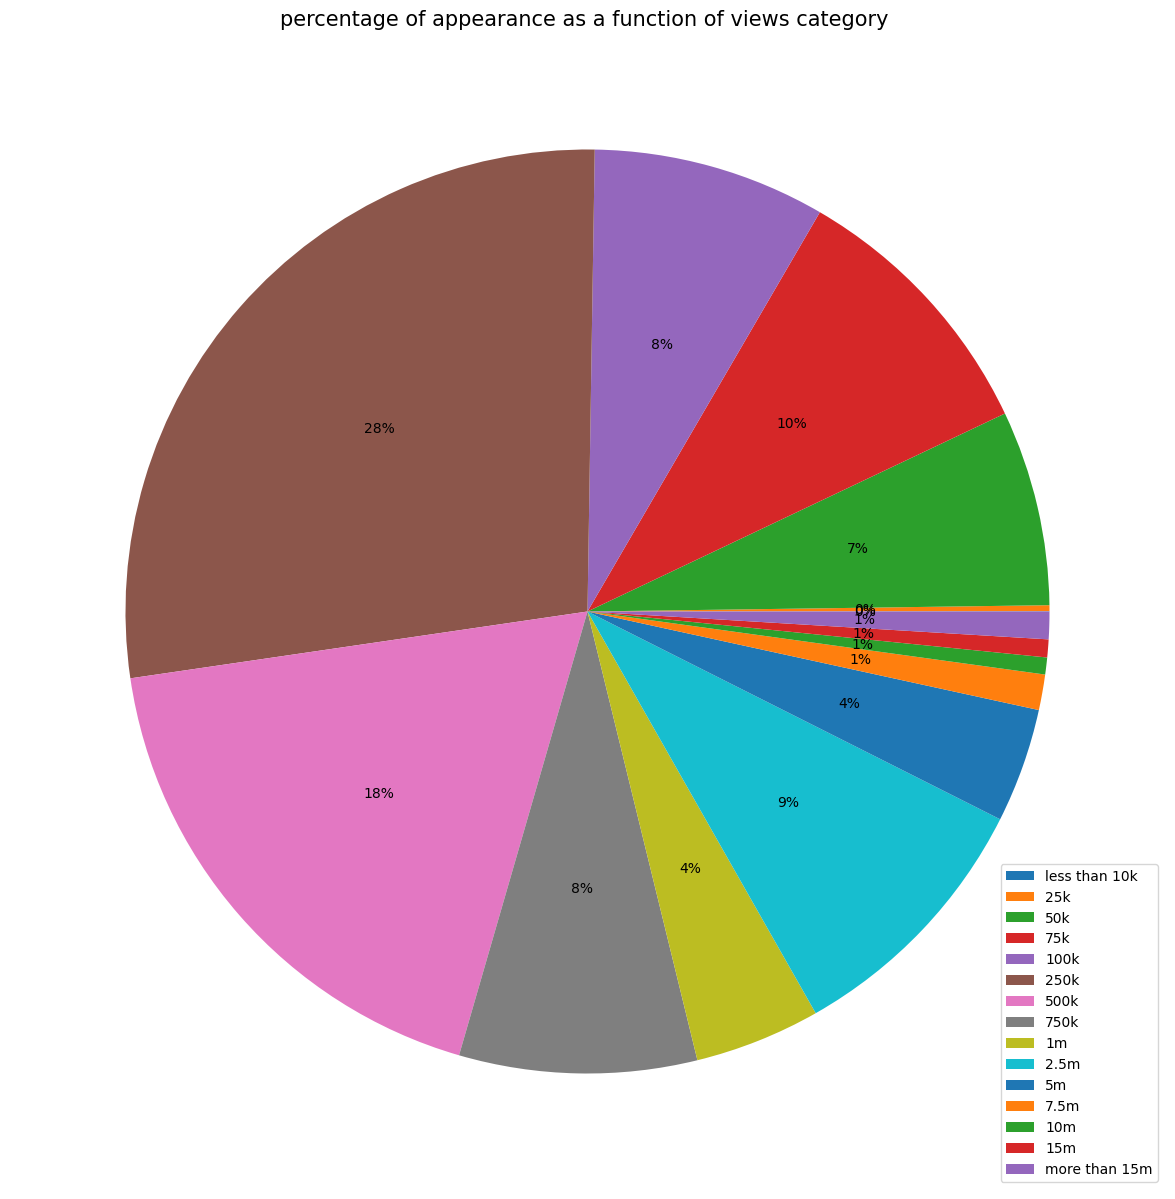

In [56]:
plt.figure(figsize=[25,15])
plt.pie(appreanf_f_view.counts,autopct='%1.0f%%')


plt.legend(sorter)
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('percentage of appearance as a function of views category ',fontsize=15)

plt.show()

#### Analysis & conclusion
The data analysis shows that there are two categories of videos that stand out in terms of the number of views and their likelihood of appearing on the trending page:

- Videos with between 100,000 and 250,000 views
- Videos with between 250,000 and 750,000 views

However, it's worth noting that all categories of view counts are distributed relatively evenly, indicating that the YouTube algorithm does not give a significant advantage to videos with a specific number of views. Additionally, it's interesting to note that there are videos with less than 50,000 views that also appear on the trending page, which can provide a significant boost in visibility for those channels.

## Does the ratio of likes/dislikes boost the probability of appearance?

In [57]:
ratio_cat = pd.pivot_table(df,index='ratio',values='video_id',aggfunc='count')

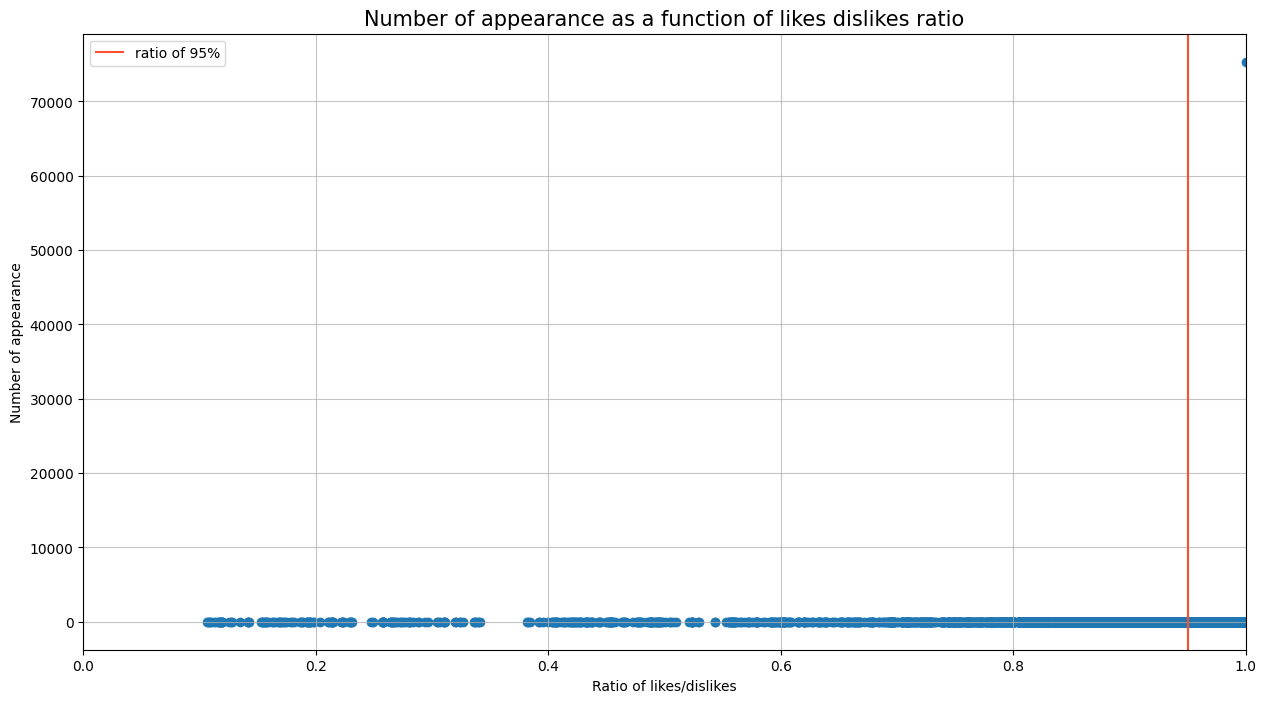

In [58]:
plt.figure(figsize=[15,8])
plt.scatter(ratio_cat.index, ratio_cat.values)

plt.axvline(0.95,color='#fc4f30',label='ratio of 95%')

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.xlim(0,1)
plt.title('Number of appearance as a function of likes dislikes ratio',fontsize=15)
plt.xlabel('Ratio of likes/dislikes')
plt.ylabel('Number of appearance')

plt.show()

#### Analysis & Conclusion:

The scatter plot above illustrates that there is a correlation between the ratio of likes to dislikes and the likelihood of a video appearing on the trending page. Videos with a ratio of 95-100% are more likely to appear on the trending page. This suggests that the YouTube algorithm favors videos that have a high ratio of likes to dislikes as it indicates that the video is likely to be well-received by a larger audience.

It's important to note that this is a correlation and not a causation, and other factors such as "Call to action" may also play a role in determining a video's chances of appearing on the trending page. This could be an interesting subject for further analysis.

## Does the number of comments endorse the probability of appearance?

In [59]:
def dispatch_com(numb):
    if numb <= 10: return 1
    Mod = numb // 10
    count_cr = len(str(numb)) - 1
    text = str(Mod)[:1]
    if count_cr > 1:
        for _ in range(count_cr-1):
            text = f"{text}0"
    return int(text)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


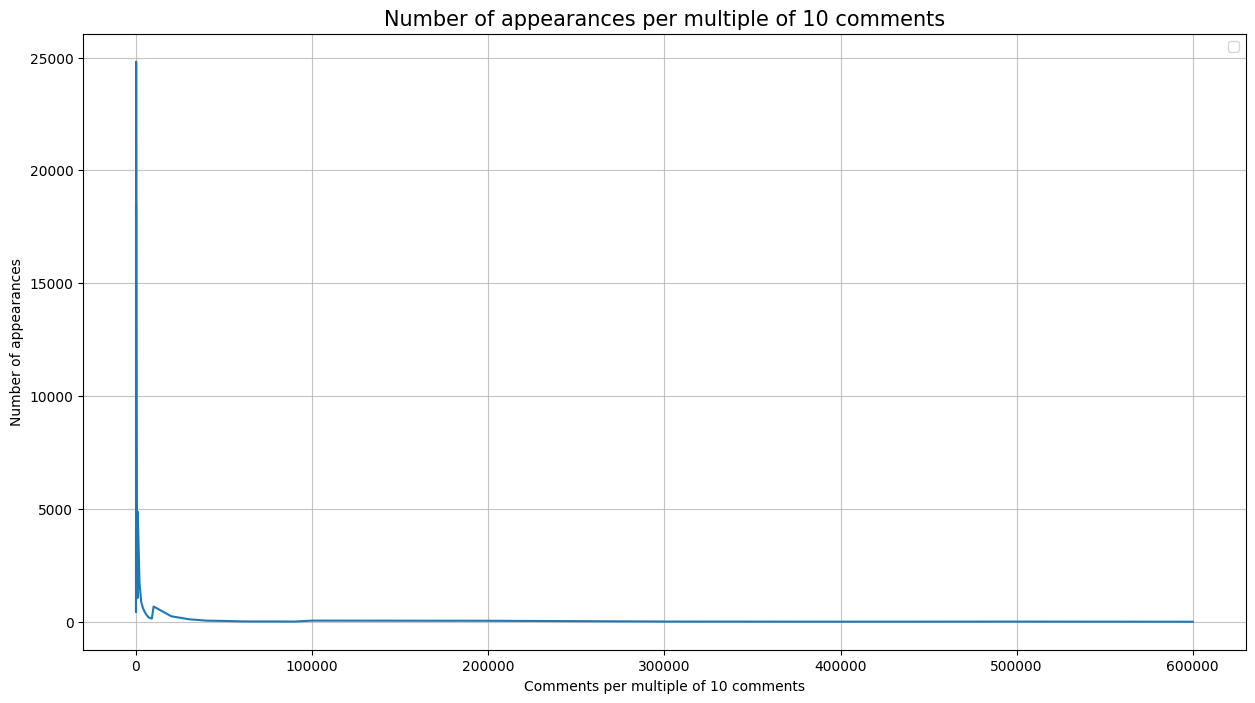

In [60]:
df['comment_cat'] = df.comment_count.apply(dispatch_com)
comment_cat = pd.pivot_table(df,index='comment_cat',values='video_id',aggfunc='count')
plt.figure(figsize=[15,8])
plt.plot(comment_cat.index, comment_cat.values)


plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('Number of appearances per multiple of 10 comments',fontsize=15)
plt.xlabel('Comments per multiple of 10 comments')
plt.ylabel('Number of appearances')

plt.show()

#### Analysis
The analysis of the data shows that there is no correlation between the number of comments on a video and its likelihood of appearing on the trending page. We can see that even videos with a high number of comments do not necessarily appear on the trending page. To further investigate this, we will limit the graph to the range of 20,000 comments in the next section.

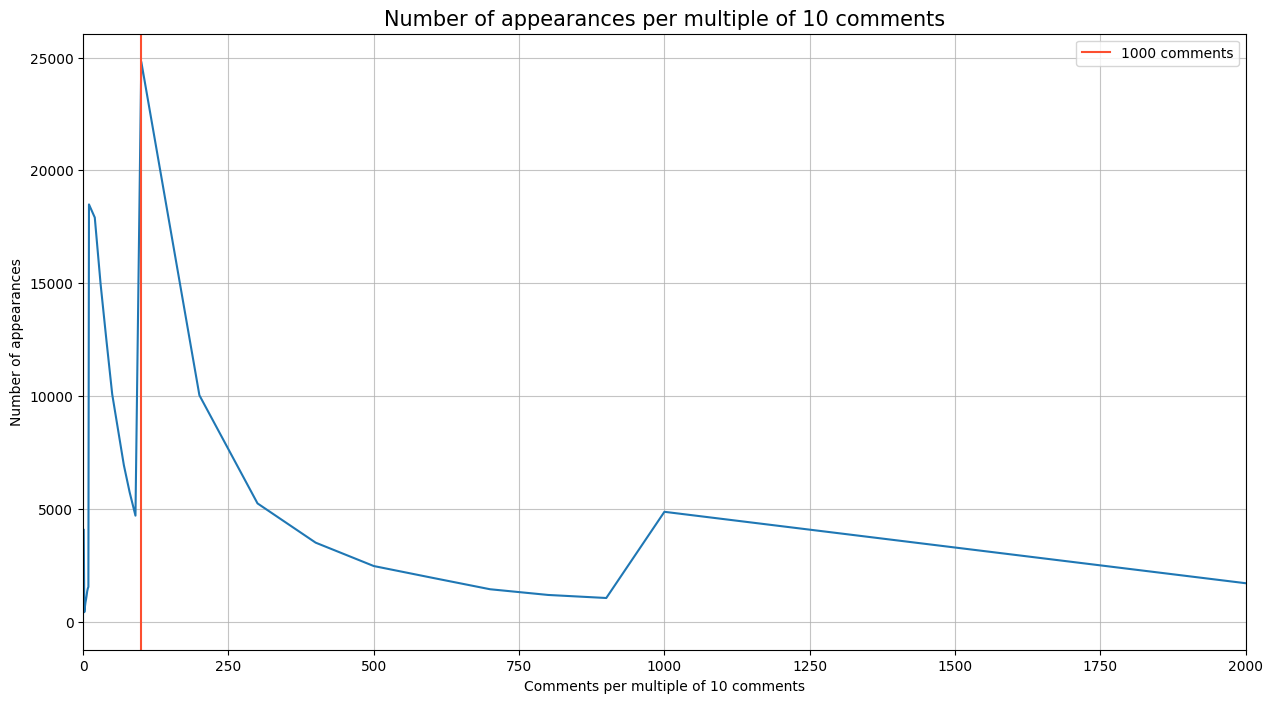

In [61]:

df['comment_cat'] = df.comment_count.apply(dispatch_com)
comment_cat = pd.pivot_table(df,index='comment_cat',values='video_id',aggfunc='count')
plt.figure(figsize=[15,8])
plt.plot(comment_cat.index, comment_cat.values)

plt.axvline(100,color='#fc4f30',label='1000 comments')
plt.xlim(0,2000)
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('Number of appearances per multiple of 10 comments',fontsize=15)
plt.xlabel('Comments per multiple of 10 comments')
plt.ylabel('Number of appearances')

plt.show()

#### Analysis and conclusion
As we can see from the graph, a peak of appearances on the trending page occurs at around 1,000 comments. However, this does not necessarily mean that having a high number of comments will increase the chances of a video appearing on the trending page. The data shows that there is no clear correlation between the number of comments and the likelihood of a video appearing on the trending page.

## What is the best hour to post your video to appear on the trending page?

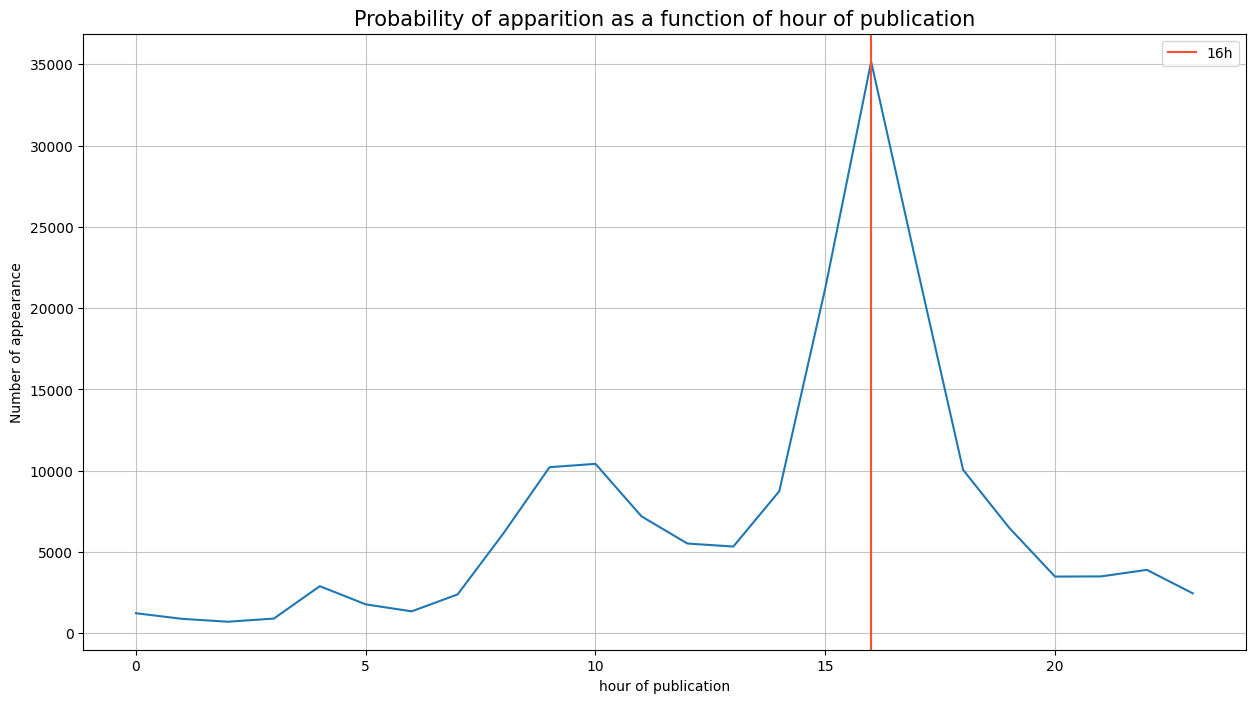

In [62]:
hour_cat = pd.pivot_table(df,index='published_hour',values='video_id',aggfunc='count')
plt.figure(figsize=[15,8])
plt.plot(hour_cat.index, hour_cat.values)

plt.axvline(16,color='#fc4f30',label='16h')

plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('Probability of apparition as a function of hour of publication',fontsize=15)
plt.xlabel('hour of publication')
plt.ylabel('Number of appearance')

plt.show()

### Analysis and conclusion

Analysis of the data suggests that the best time to publish a video on YouTube, in terms of likelihood of appearing on the trending page, is at 10 a.m or 4 p.m. 

This may be linked to French behavior habits, as French workers and students tend to have small breaks during these time frames throughout the day and may be more likely to check and engage with YouTube content during these times. 

Additionally, videos posted at 4 p.m may also have a longer time to be viewed and engaged with after working hours.

# What is the best day to post your video to appear on the trending page?

In [63]:
day_cat = df.groupby('published_day').size().reset_index(name='counts').sort_values(by='counts', ascending=True)
sorter = ['Monday','Tueday','Wednesday','Thursday','Friday','Saturday','Sunday']
sorterIndex = dict(zip(sorter, range(len(sorter))))
day_cat['rank'] = day_cat['published_day'].map(sorterIndex)
day_cat = day_cat.sort_values(by='rank')
day_cat.drop(['rank'], axis=1, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


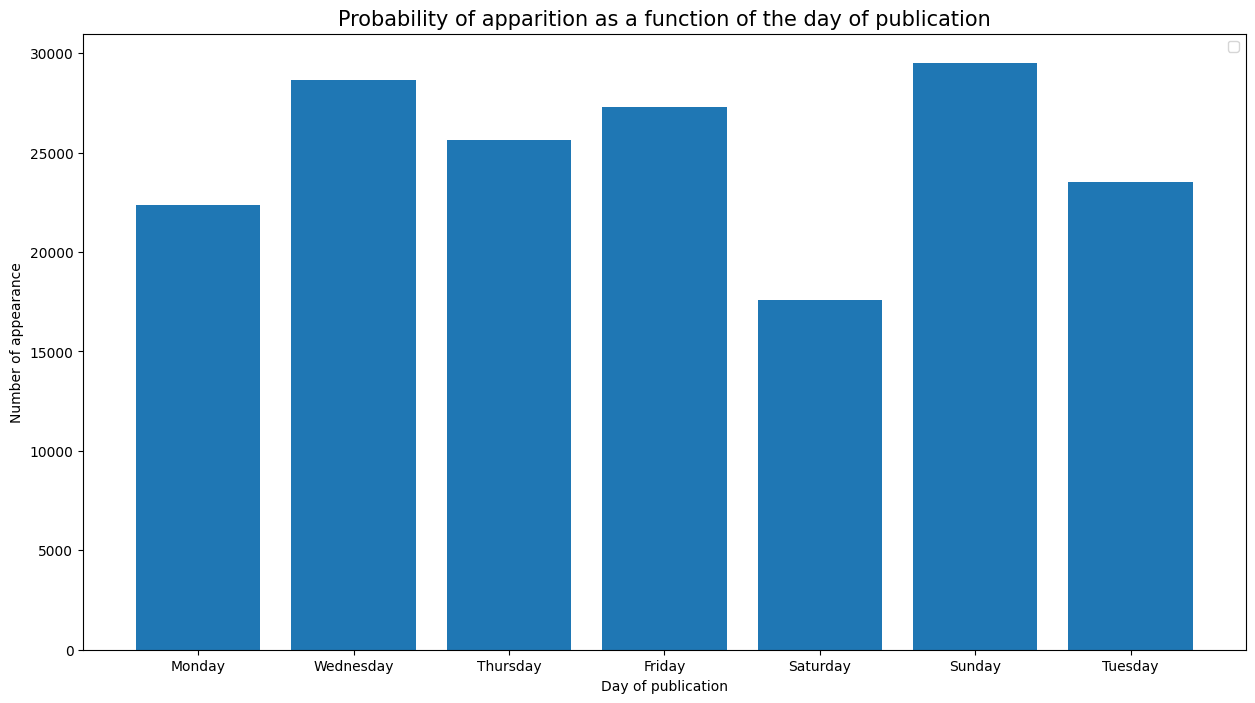

In [64]:
plt.figure(figsize=[15,8])
plt.bar(day_cat.published_day, day_cat.counts)

plt.legend()

plt.title('Probability of apparition as a function of the day of publication',fontsize=15)
plt.xlabel('Day of publication')
plt.ylabel('Number of appearance')

plt.show()

### Analysis and conclusion
The analysis of the data shows that while all days of the week are relatively close in terms of the likelihood of a video appearing on the trending page, there are some days that stand out. The best days to post a video in terms of appearing on the trending page are Wednesday, Friday, and Sunday. In contrast, the worst day to post a video is Saturday.

This behavior can be explained by French user's habits. Saturdays are typically dedicated to going out and engaging in activities other than using the YouTube website, resulting in a lower reach. Conversely, Sunday marks the start of the working week, Wednesday is the mid of the working week, and Friday is the end of the working week, users tend to consume more entertainment content and thus, the high number of appearances.

# Combining the best days vs. hours of publication

Text(0, 0.5, 'Number of appearance')

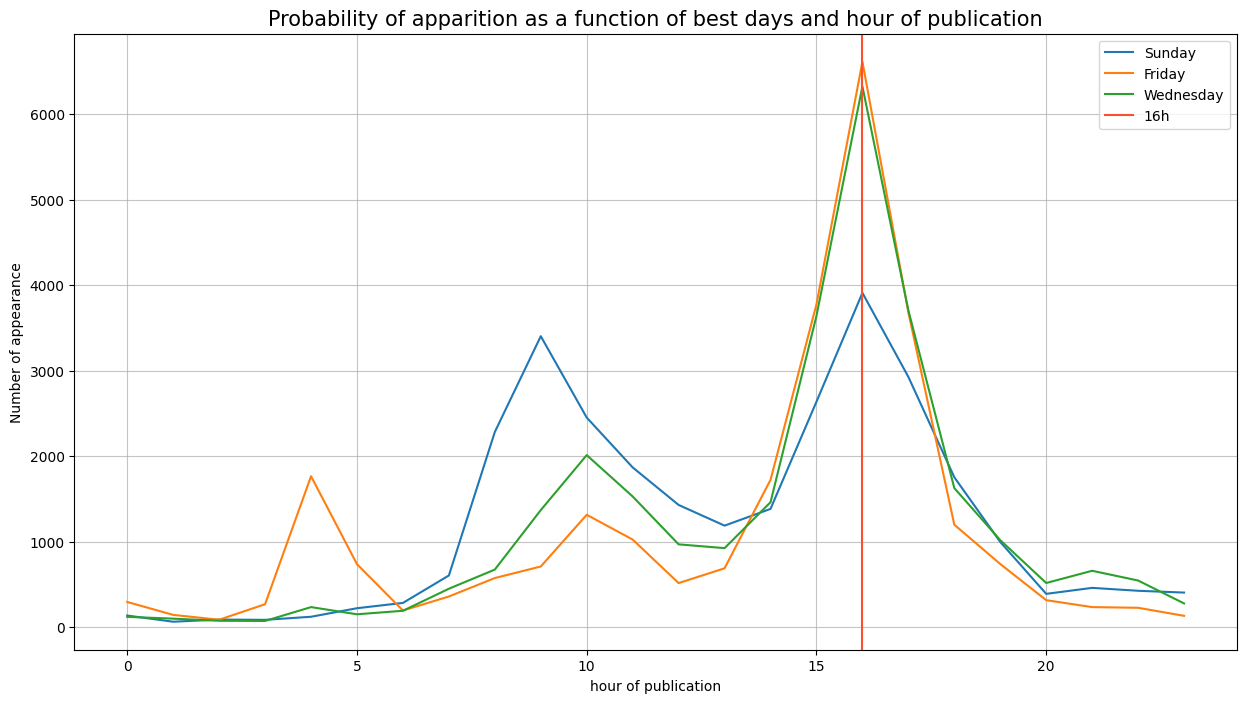

In [65]:
pivot = pd.pivot_table(df,index='published_hour',columns='published_day',values='video_id',aggfunc='count')

plt.figure(figsize=[15,8])
plt.plot(pivot.index, pivot.Sunday,label='Sunday')
plt.plot(pivot.index, pivot.Friday,label='Friday')
plt.plot(pivot.index, pivot.Wednesday,label='Wednesday')

plt.axvline(16,color='#fc4f30',label='16h')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.grid(axis='x', alpha=0.75)
plt.title('Probability of apparition as a function of best days and hour of publication',fontsize=15)
plt.xlabel('hour of publication')
plt.ylabel('Number of appearance')


### Analysis and conclusion
From the analysis, there are no significant changes in terms of the best hours to publish a video throughout the week. However, on Sunday it appears that slightly earlier time frames, around 9 a.m, may be more favorable for a video to appear on the trending page.

Additionally, Wednesday and Friday appear to be relatively similar in terms of their likelihood of a video appearing on the trending page, so if you have a rhythm of 2 videos per week, it may be beneficial to choose these two days and publish them in the 4 p.m time frame.

# General conclusions

Writing the title of your videos in CAPSLOCK does not increase the probability of your video appearing on the trending page
- Using CAPSLOCK in video titles does not increase the likelihood of appearing on the trending page.
- The number of views is not strongly correlated to the probability of appearing on the trending page.
- The best days to post videos for a higher likelihood of appearing on the trending page are Wednesday, Friday, and Sunday.
- The best time frames to post videos for a higher likelihood of appearing on the trending page are 10 a.m and 4 p.m
- Videos with a higher ratio of likes to dislikes have a higher likelihood of appearing on the trending page.
  
As a result, to appear on the trending page, you can follow this strategy:
- Write a self-descriptive title without using CAPSLOCK
- Try to post twice a week at 4 p.m to increase your chances of appearing on the trending page
- Give genuine and attractive content to ensure a positive likes/dislikes ratio of up to 90% or more

# Limitations

There are several limitations to this study including:
- All conclusions are based on correlations, not causation
- There is missing information on viewer retention per video
- There is missing information on the click-through rate per video
- There is no information on the impact of the thumbnail on the probability of appearing on the trending page
- There is missing information on video length in the data set that could complement this study.

> Notice:
**I used this case study to train myself using my new skills in Data analysis, so please do not take this work as a guide for your next video creation** 